In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
from math import sqrt
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2
import statsmodels.api as sm
import scipy.stats as scs
sns.set()

%matplotlib inline
df =  pd.read_csv('data/BTCUSDT.csv')
df.columns = ['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trade', 'base', 'quote', 'ignore'] 
df.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trade,base,quote,ignore
0,1638316800000,56975.25,59037.85,56468.39,57211.70,241.850967,1638403199999,1.387079e+07,11481,113.041453,6.485435e+06,0
1,1638403200000,57178.62,57368.02,55789.75,56520.76,167.960101,1638489599999,9.503861e+06,10584,97.846875,5.538904e+06,0
2,1638489600000,56544.33,57601.83,51694.02,53624.36,342.880230,1638575999999,1.866058e+07,16174,170.513603,9.268041e+06,0
3,1638576000000,53647.22,53854.41,41582.75,49181.98,1029.990140,1638662399999,4.940507e+07,38337,546.208095,2.614709e+07,0
4,1638662400000,49189.69,49681.10,47760.62,49391.47,225.157464,1638748799999,1.101717e+07,13085,118.979864,5.824113e+06,0


In [2]:
#creating return
df['returns'] = df.close.pct_change(1 ) * 100

In [3]:
#create squared return
df['sq_returns'] = df.returns.mul(df.returns)

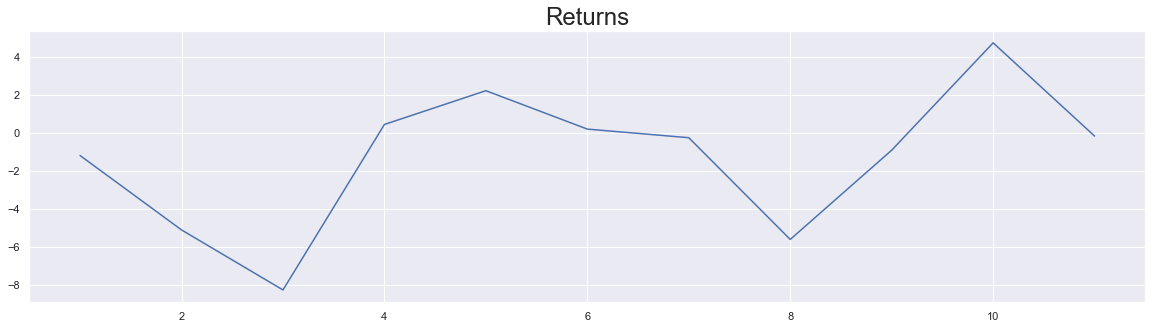

In [4]:
#Returns vs Squared Returns
df.returns.plot(figsize = (20,5))
plt.title("Returns", size = 24)
plt.show()

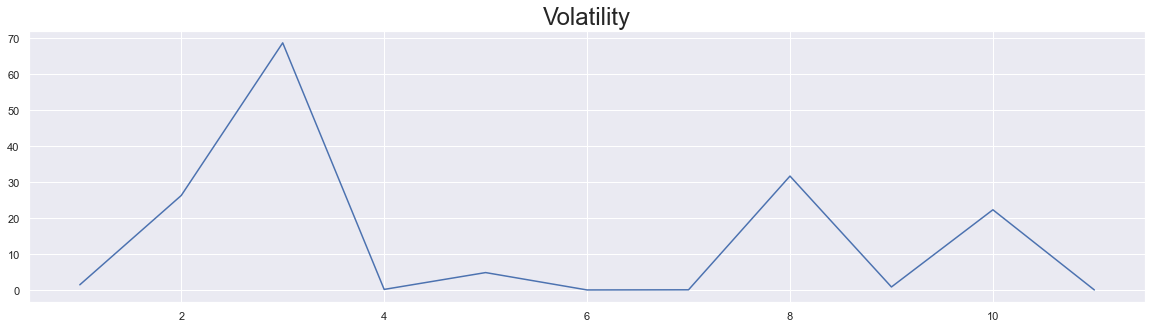

In [5]:
df.sq_returns.plot(figsize = (20,5))
plt.title("Volatility", size = 24)
plt.show()

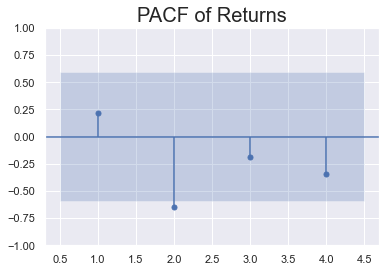

In [6]:
sgt.plot_pacf(df.returns[1:], lags = 4, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF of Returns", size = 20)
plt.show()

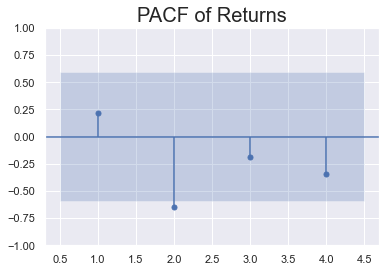

In [7]:
sgt.plot_pacf(df.returns[1:], lags = 4, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF of Returns", size = 20)
plt.show()

In [8]:
from arch import arch_model

In [9]:
model_arch_1 = arch_model(df.returns[1:])
result_arch_1 = model_arch_1.fit(update_freq= 5)
result_arch_1.summary()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 29.53089361078876
            Iterations: 4
            Function evaluations: 21
            Gradient evaluations: 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -29.5309
Distribution:                  Normal   AIC:                           67.0618
Method:            Maximum Likelihood   BIC:                           68.6534
                                        No. Observations:                   11
Date:                Tue, Jan 04 2022   Df Residuals:                       10
Time:                        09:37:15   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -1.2818      1.132     -1.132      0.258 [ -3.501,  0.937]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          6.2882     11.192      0.562      0.574 [-15.647, 28.224]
alpha[1]       0.0000  5.690e-02      0.000      1.000 [ -0.112,  0.112]
beta[1]        0.5074      1.007      0.504      0.614 [ -1.467,  2.482]
========================================================================

Covariance estimator: robust
"""

In [10]:
#the simple arch(1)
model_arch_1 = arch_model(df.returns[1:], mean = "Constant", lags= [2, 3, 6],  vol = "ARCH", p = 1, dist = "ged")
result_arch_1 = model_arch_1.fit(update_freq= 5)
result_arch_1.summary()

Iteration:      5,   Func. Count:     26,   Neg. LLF: 29.27055769017815
Iteration:     10,   Func. Count:     69,   Neg. LLF: 29.13989407137683
Iteration:     15,   Func. Count:     94,   Neg. LLF: 29.11567043881733
Optimization terminated successfully    (Exit mode 0)
            Current function value: 29.115665577913035
            Iterations: 17
            Function evaluations: 108
            Gradient evaluations: 17


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Constant Mean - ARCH Model Results                            
==========================================================================================
Dep. Variable:                            returns   R-squared:                       0.000
Mean Model:                         Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                   ARCH   Log-Likelihood:               -29.1157
Distribution:      Generalized Error Distribution   AIC:                           66.2313
Method:                        Maximum Likelihood   BIC:                           67.8229
                                                    No. Observations:                   11
Date:                            Tue, Jan 04 2022   Df Residuals:                       10
Time:                                    09:37:18   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.2716  1.018e-03   -266.814      0.000 [ -0.274, -0.270]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega         13.4142     24.779      0.541      0.588 [-35.151, 61.979]
alpha[1]   1.2833e-17      1.654  7.759e-18      1.000 [ -3.242,  3.242]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             1.0100      4.979      0.203      0.839 [ -8.748, 10.768]
========================================================================

Covariance estimator: robust
"""

In [11]:
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


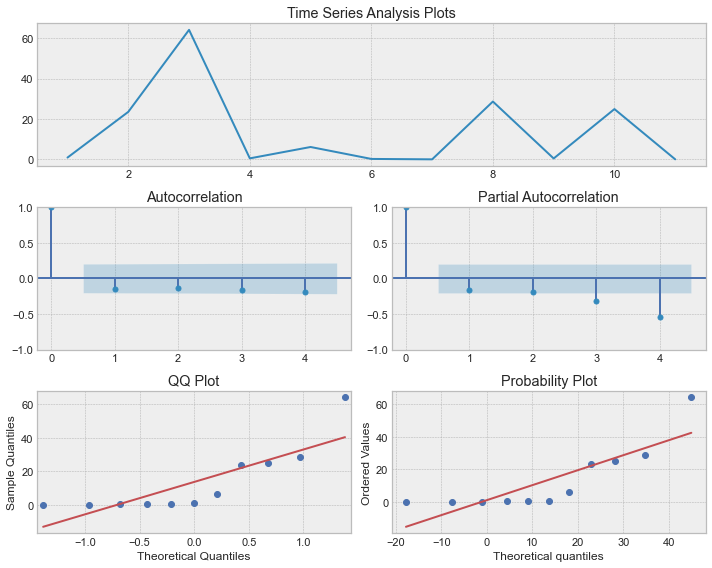

In [12]:
tsplot(result_arch_1.resid**2, lags=4)

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


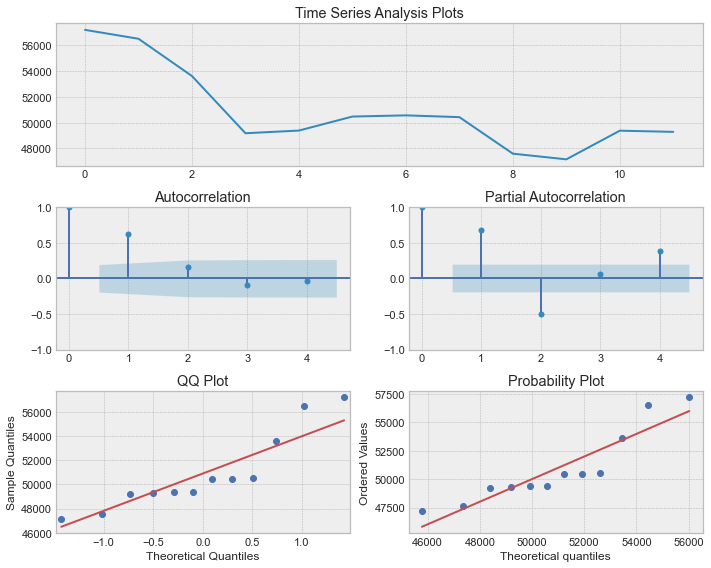

In [13]:
tsplot(df.close, lags=4)

In [ ]:
#the higher-lag arch(2)
model_arch_2 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 2)
result_arch_2 = model_arch_2.fit(update_freq= 5)
result_arch_2.summary()

In [ ]:
#the higher-lag arch(3)
model_arch_3 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 3)
result_arch_3 = model_arch_3.fit(update_freq= 5)
result_arch_3.summary()

In [ ]:
#model garch
model_garch_1 = arch_model(df.returns[1:], mean = "Constant", vol = "GARCH", p = 1, q = 1)
results_garch_1 = model_garch_1.fit(update_freq = 5)
results_garch_1.summary()